<a href="https://colab.research.google.com/github/asyhar22/kalbe_farma_ds/blob/main/VIX_Kalbe_Nutritionals_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import kmeans_plusplus
from sklearn import metrics
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("https://github.com/asyhar22/kalbe_farma_ds/raw/main/DATA/merged_data.xlsx")
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Product Name,Price_y,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Crackers,7500,36,0,Married,10.53,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR16356,165,01/01/2022,P9,10000,7,70000,1,Yoghurt,10000,44,1,Married,14.58,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
2,TR1984,183,01/01/2022,P1,8800,4,35200,4,Choco Bar,8800,27,1,Single,0.18,Gita Ginara,Gita,General Trade,-6.966667,110.416664
3,TR35256,160,01/01/2022,P1,8800,7,61600,4,Choco Bar,8800,48,1,Married,12.57,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,TR41231,386,01/01/2022,P9,10000,1,10000,4,Yoghurt,10000,33,0,Married,6.95,Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [4]:
df = df.groupby('CustomerID').agg({'TransactionID':'count','Qty':'sum','TotalAmount':'sum'})
df.head()

,TransactionID,Qty,TotalAmount
CustomerID,,,
1,17,60,623300
2,13,57,392300
3,15,56,446200
4,10,46,302500
5,7,27,268600


In [5]:
X = np.array(df)
X1 = np.array(df['TransactionID'])
X2 = np.array(df['Qty'])
X3 = np.array(df['TotalAmount'])

In [17]:
# Optimal value of k (elbow method)
inertia = []
for n in range(1,11):
  model = (KMeans(n_clusters=n, init='k-means++', n_init=10))
  model.fit(X)
  inertia.append(model.inertia_)

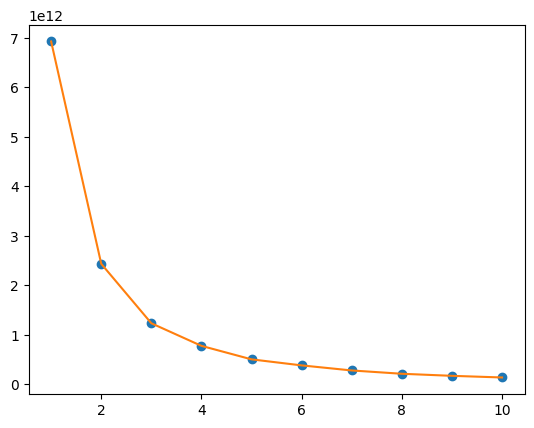

In [19]:
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-')
plt.show()

In [23]:
# k = 4
model = (KMeans(n_clusters=4, init='k-means++', n_init=10))
model.fit(X)

model_labels = model.labels_
model_centroid = model.cluster_centers_

y_kmeans = model.predict(X)
y_kmeans

array([3, 1, 1, 2, 2, 1, 1, 3, 2, 1, 0, 3, 3, 1, 1, 1, 2, 1, 3, 3, 2, 1,
       1, 1, 0, 0, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 3, 2, 1, 2, 0, 1, 3, 3,
       3, 1, 3, 2, 2, 0, 1, 2, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 3, 2, 0, 1,
       1, 0, 2, 2, 2, 3, 1, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1, 3,
       3, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 3, 3, 3, 1, 2, 0,
       0, 3, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 3, 2, 1, 2, 1, 1,
       3, 1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2,
       1, 3, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 0, 3, 3, 2, 1, 2, 0,
       2, 1, 0, 0, 2, 2, 2, 3, 0, 2, 1, 2, 3, 1, 2, 0, 0, 0, 1, 2, 2, 1,
       1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 2, 2, 1, 2, 2, 2, 1, 1, 3, 2,
       2, 1, 1, 2, 2, 1, 0, 2, 1, 0, 1, 2, 3, 1, 1, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 3, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 3, 0, 0, 3, 1,
       0, 2, 1, 1, 2, 3, 2, 1, 1, 0, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 0,
       2, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 3, 0, 3,

In [42]:
df['cluster'] = y_kmeans
df

,TransactionID,Qty,TotalAmount,cluster
CustomerID,,,,
1,17,60,623300,3
2,13,57,392300,1
3,15,56,446200,1
4,10,46,302500,2
5,7,27,268600,2
...,...,...,...,...
443,16,59,485100,1
444,18,62,577700,3
445,18,68,587200,3


In [43]:
import plotly as py
import plotly.graph_objs as go

graph = go.Scatter3d(
    x=df['TransactionID'],
    y=df['Qty'],
    z=df['TotalAmount'],
    mode='markers',
    marker=dict(
        color=df['cluster'],
        size=10,
        line=dict(
            color=df['cluster'],
            width=12,
        )
    )
)

fig = go.Figure(data=graph)
py.offline.iplot(fig)

In [44]:
df.to_excel("clustered customers.xlsx", index=False)